# article_new 

In [1]:
import numpy as np
import random
from random import sample
import math 

In [2]:
z = 10 #Degradation threshold

def state(amount):
    new_state = []    
    if (amount >= 0 and amount <3):
        new_state = 0 # healthy1
    
    if (amount >= 3 and amount <7):
        new_state = 1 # healthy2
        
    if (amount >= 7 and amount < z ):
        new_state = 2 #healthy3 
        
    if (amount >= z):
        new_state = 3 # fail
    
    return new_state

In [3]:
def Rewardfun(degradation):
    Reward=np.zeros((4,)+(3,))
    Reward[: , 0] = -50
    Reward[3,0] = -1050
    Reward[: , 1] = -500*(degradation/z)-50
    Reward[3,1] = -1150
    Reward[: , 2] = -550
    Reward[3,2] = -1550
       
    return Reward

In [423]:
a = 8

def Envirenment(degradation , action):
   
    n2 = np.random.poisson(4, 1) # number of effective shock
    w2 = np.random.gamma(1, 1.2, n2) # magnitude of effective shock
    magnitude = sum(w2)
    next_state = 0
    reward = 0
    current_state = state(degradation)
    if action == 0 :#do nothing
        
            degradation += (magnitude + 3)/a
            next_state=state(degradation)
            Reward=Rewardfun(degradation)
            reward=Reward[next_state ,action]
        
    if action == 1 : #repair
        
            decay = np.random.beta(0.8, 1, 1)[0]
            #decay = degradation / z
            #degradation -= decay*degradation
            degradation = np.max((0.05, degradation))
            #decay = (np.random.gamma(degradation*degradation/2,2/(degradation),1)/z)[0]
            #degradation -= np.max((0, decay*degradation))
            degradation =  decay*degradation
            #degradation = np.max((0.05, degradation))
            degradation += (magnitude + 2.95)/a
            next_state=state(degradation)
            Reward=Rewardfun(degradation)
            reward=Reward[next_state ,action]
                    
    if action == 2 : # replace
        
            degradation = (magnitude + 2.85)/a
            next_state=state(degradation)
            Reward=Rewardfun(degradation)
            reward=Reward[next_state ,action]
       
    
    return next_state , reward , degradation


In [424]:
Envirenment(0.02255, 1)

(0, -152.38721796385715, 2.0477443592771434)

In [425]:
degradation=5.214445
(np.random.gamma(degradation*degradation/2,2/(degradation+0.001),20)/z)

array([0.6919036 , 0.81251004, 0.48717272, 0.61319398, 0.30637785,
       0.66303727, 0.29389496, 0.77072701, 0.34021494, 0.50177987,
       0.57078053, 0.4195312 , 0.40731701, 0.48006423, 0.52321451,
       0.28402145, 0.36486158, 0.59646586, 0.40935826, 0.55323878])

In [426]:
np.mean(np.random.beta(0.2, 10, 1000))

0.02081609743997284

In [427]:
def choose_action(epsilon,current_state):
    if current_state == 3 :
        return 2 #replace
    else:
        if (np.random.random() < epsilon):
            return random.choice([0,1,2]) 
        else:
            return np.argmax(Q_table[current_state])

In [428]:
num_episodes=2000
discount=0.88

In [429]:
epsilon = 1
learning_rate = 1

Q_table = np.zeros((4,3))
old_Q = 0
Q_table[3,0]= -100000000
Q_table[3,1]= -100000000
scores = []
deltas = []

# Looping for each episode
for e in range(600):
    # Initializes the state
    current_state = 0 #it is new
    degradation = 0  #it is new
    rewards = []
    biggest_change = 0
       
    # Looping for each step
    for j in range(100 +1):
        # Choose A from S
        action = choose_action(epsilon,current_state)
        # Take action
        obs , reward , degradation = Envirenment(degradation,action)
        rewards.append(reward)
        new_state = obs
        
        old_Q = Q_table[current_state][action] 
        # Update Q(S,A)
        Q_table[current_state][action] += (learning_rate * 
                                        (reward 
                                         + discount * np.max(Q_table[new_state]) 
                                         - Q_table[current_state][action]))
        
        biggest_change = max(biggest_change, np.abs(old_Q - Q_table[current_state][action]))
        current_state = new_state
        
    learning_rate *= 0.99
    epsilon *= 0.99
    scores.append(sum(rewards))
    deltas.append(biggest_change)

In [430]:
print(current_state)
print(action)

0
1


In [431]:
Q_table[2][1]

-956.0463536459512

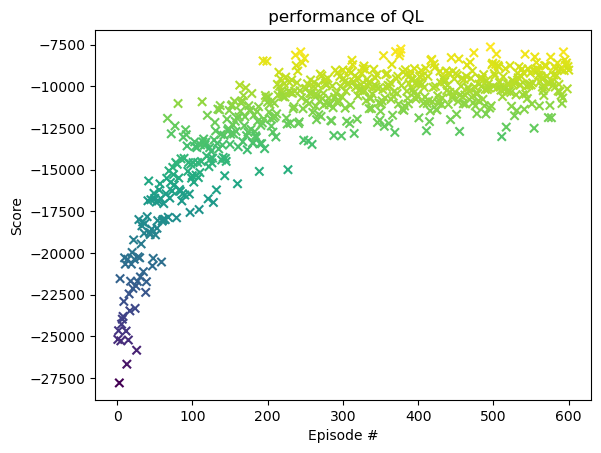

In [432]:
# Plot the policy performance
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(111)
x = np.arange(1, len(scores) + 1)
y = scores
plt.scatter(x, y, marker='x', c=y)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.title(' performance of QL')
plt.show()

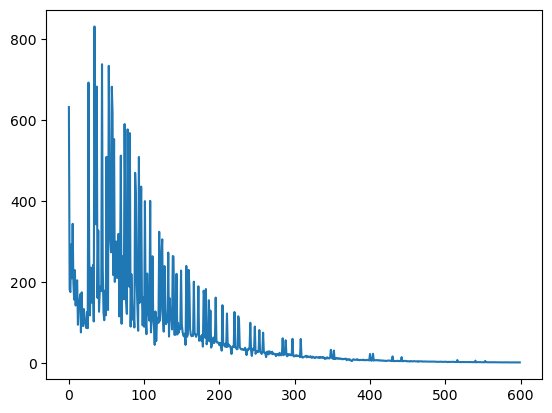

In [433]:
import matplotlib.pyplot as plt
plt.plot(deltas)
plt.show()

In [434]:
Q_table

array([[-7.15782548e+02, -7.64621510e+02, -1.16579933e+03],
       [-7.91849621e+02, -8.64267098e+02, -1.17388399e+03],
       [-1.03227171e+03, -9.56046354e+02, -1.16606317e+03],
       [-1.00000000e+08, -1.00000000e+08, -1.16251926e+03]])

In [435]:
expected_optimal_cost=[]
expected_optimal_time=[]

for o in range(2000):
    
    optimal_value =[]
    current_state = 0 #it is new
    degradation = 0
    optimal_cost = []
    
    num=[]
    numm =[]

    for j in range(50):
        #Choose A from S
        action = np.argmax(Q_table[current_state])
        if action == 1:
            optimal_value.append(degradation) 
            num.append(j)

        numm =[3*num[i] - 3*num[i-1] for i in range(1, len(num))]
        #print(num , numm)
        # Take action
        current_state, reward ,degradation= Envirenment(degradation,action)
        optimal_cost.append(-reward)
        #print(optimal_cost)
        #if any(np.array(optimal_cost) > 50):
            #expected_optimal_cost.append(np.mean(optimal_cost))
        #if action ==1:
            #optimal_cost = []
        #print (reward ,degradation , action)
        
    expected_optimal_cost.append(np.mean(optimal_cost))
    expected_optimal_time.append(np.mean(numm))
print("optimal degradation for repair=",np.mean(optimal_value))

print("Time for repair =",np.mean(expected_optimal_time))

print("cost for repair =",np.mean(expected_optimal_cost))

optimal degradation for repair= 7.641852371214033
Time for repair = 13.188830867049617
cost for repair = 94.21460184290545
